In [1]:
# Time Series Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# Load the dataset
file_path = ('./Resources/tickets_2024_09.csv') # Update path if necessary
df = pd.read_csv(file_path, low_memory=False)

# Display the first few rows to understand the data structure
df.head()


,OBJECTID,TICKET_NUMBER,VIOLATION_TYPE_DESC,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROC_DESC,...,PENALTY_2,PENALTY_3,PENALTY_4,PENALTY_5,XCOORD,YCOORD,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM
0,83487425,260566401,P,2024/09/05 04:00:00+00,657,54,ST.ELZBETH HOSPITAL SECURITY GUARDS,SEH,P170,FAILURE TO DISPLAY CURRENT TAGS,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2024/10/16 14:04:18+00
1,83487426,266969312,P,2024/09/18 04:00:00+00,133,59,US. BUREAU OF ENGRAVING AND PRINTNG,BEP,P055,NO PARKING ANYTIME,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2024/10/16 14:04:18+00
2,83487445,266974724,P,2024/09/01 04:00:00+00,1020,59,US. BUREAU OF ENGRAVING AND PRINTNG,BEP,P012,DISOBEYING OFFICIAL SIGN,...,0,0,0,0,397076.780,135370.390,38.886,-77.034,810050.0,2024/10/16 14:04:18+00
3,83487446,266974735,P,2024/09/08 04:00:00+00,1051,59,US. BUREAU OF ENGRAVING AND PRINTNG,BEP,P170,FAILURE TO DISPLAY CURRENT TAGS,...,0,0,0,0,397328.708,135348.587,38.886,-77.031,805720.0,2024/10/16 14:04:18+00
4,83487447,266974746,P,2024/09/08 04:00:00+00,1108,59,US. BUREAU OF ENGRAVING AND PRINTNG,BEP,P170,FAILURE TO DISPLAY CURRENT TAGS,...,0,0,0,0,397328.637,135237.646,38.885,-77.031,801948.0,2024/10/16 14:04:18+00


In [4]:
# Convert 'ISSUE_DATE' to datetime format
df['ISSUE_DATE'] = pd.to_datetime(df['ISSUE_DATE'], errors='coerce')

# Extract Date and Time Components for Analysis
df['Date'] = df['ISSUE_DATE'].dt.date
df['Hour'] = df['ISSUE_DATE'].dt.hour
df['DayOfWeek'] = df['ISSUE_DATE'].dt.day_name()
df['Month'] = df['ISSUE_DATE'].dt.month

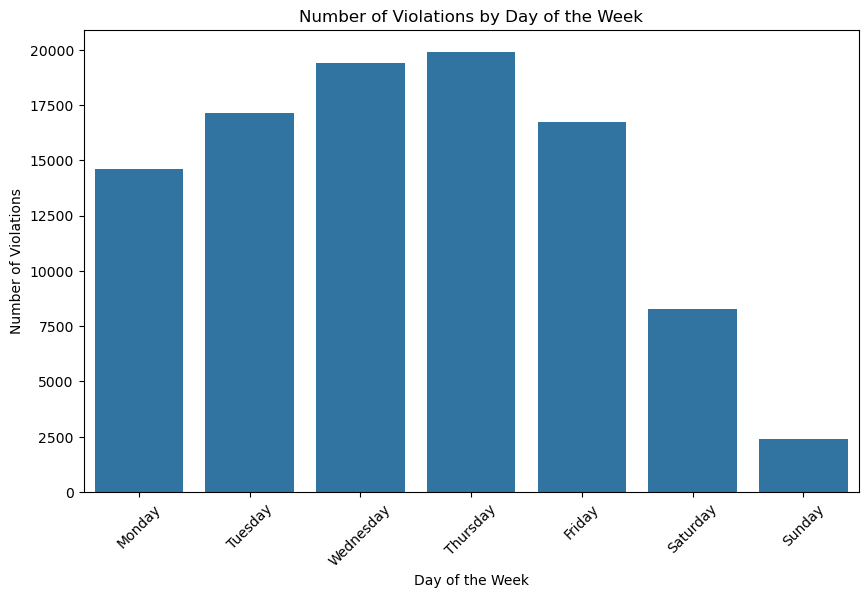

In [5]:
# Exploratory Data Analysis
# Plot Violations by Day of the Week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DayOfWeek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Violations by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45)
plt.show()

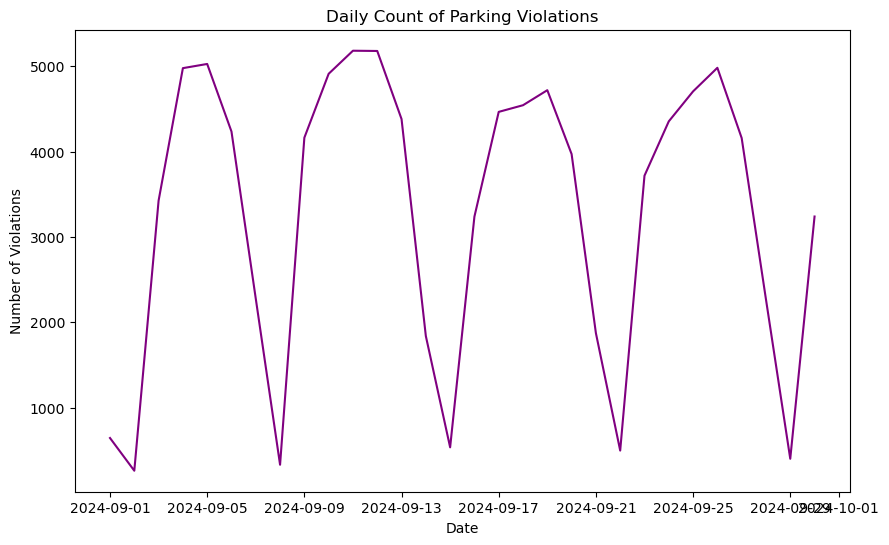

In [6]:
# Aggregate Violations by Date
daily_violations = df.groupby('Date').size()

# Plot Daily Violations
plt.figure(figsize=(10, 6))
daily_violations.plot(title="Daily Count of Parking Violations", color='purple')
plt.xlabel('Date')
plt.ylabel('Number of Violations')
plt.show()

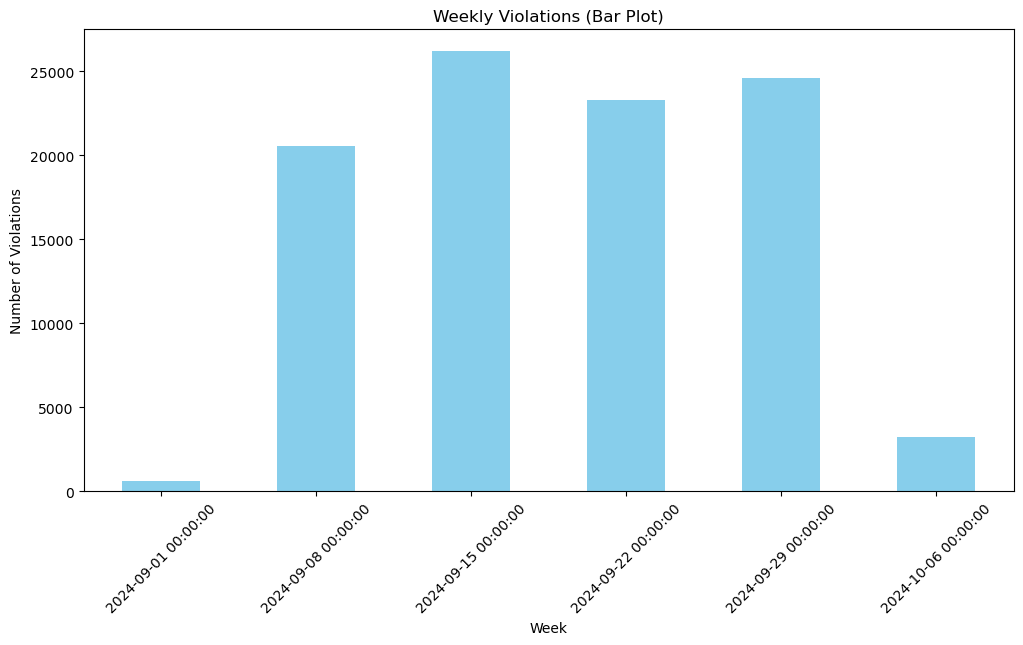

In [7]:
# Drop 'level_0' if it exists
if 'level_0' in df.columns:
    df = df.drop(columns=['level_0'])

# Convert 'Date' to datetime if not already done
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Set 'Date' as the index for easy resampling
df.set_index('Date', inplace=True)

# Resample the data to weekly frequency and count the violations per week
weekly_violations = df.resample('W').size()

# Plot a bar plot for weekly violations
plt.figure(figsize=(12, 6))
weekly_violations.plot(kind='bar', color='skyblue')
plt.title("Weekly Violations (Bar Plot)")
plt.xlabel("Week")
plt.ylabel("Number of Violations")
plt.xticks(rotation=45)
plt.show()


In [8]:
# Optional: Seasonal Decomposition
# Decompose the time series to observe trend, seasonality, and residuals
# Note: Seasonal decomposition expects a datetime index for proper processing.
daily_violations_ts = daily_violations.copy()
daily_violations_ts.index = pd.to_datetime(daily_violations_ts.index)  # Convert Date index to datetime for decomposition



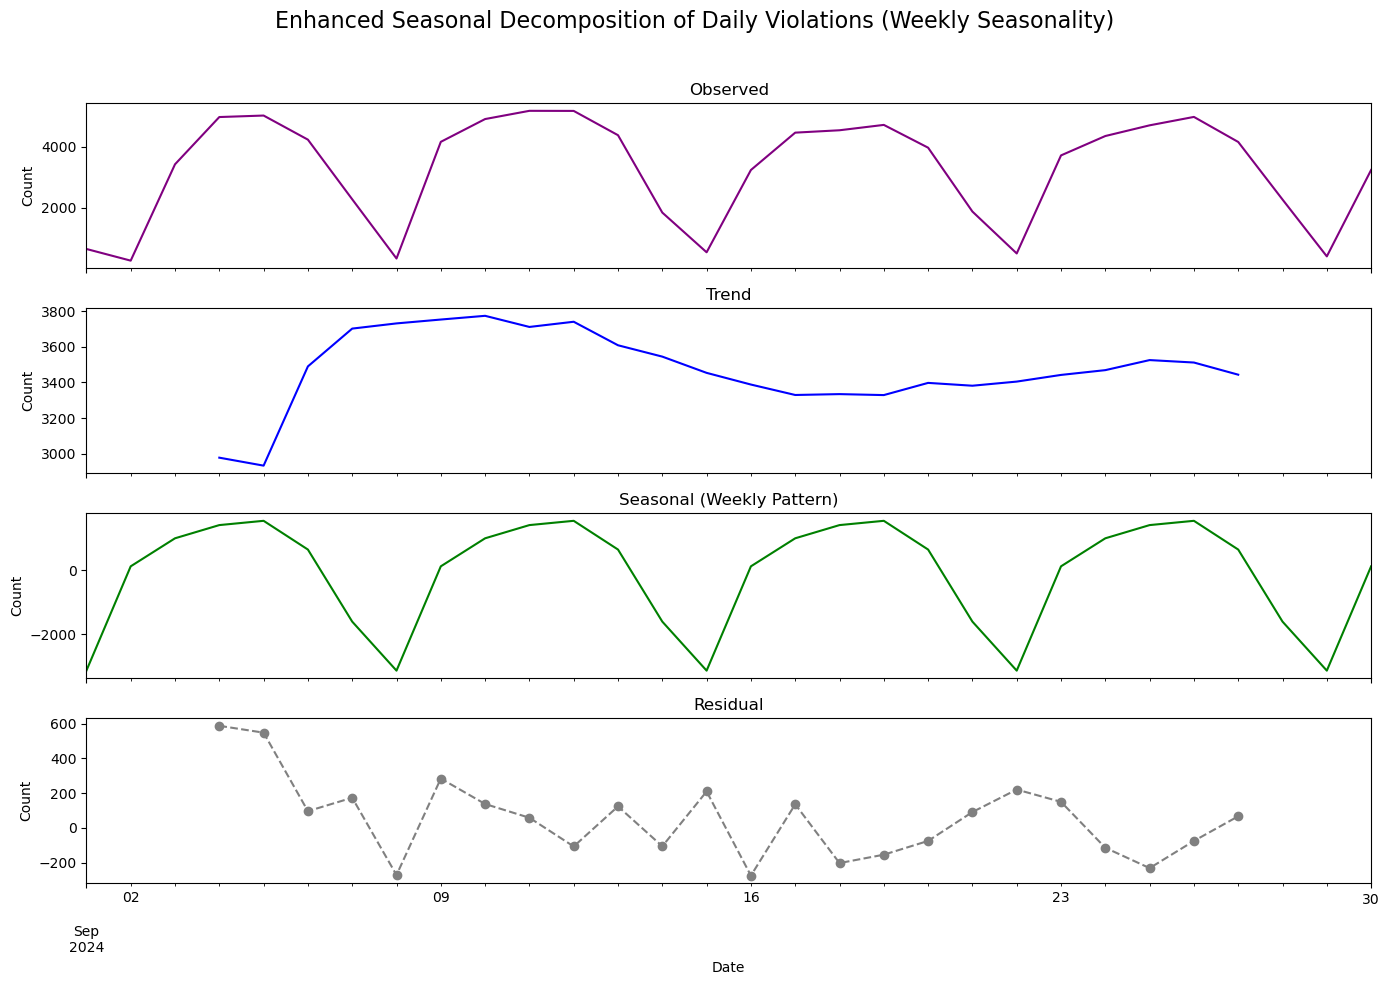

In [9]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Re-run seasonal decomposition with the weekly seasonality (period=7) as we did earlier
decomposition = seasonal_decompose(daily_violations_ts, model='additive', period=7)

# Create a larger figure to improve clarity
fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

# Plot each component with enhanced clarity
decomposition.observed.plot(ax=axes[0], color='purple', linewidth=1.5, title="Observed")
decomposition.trend.plot(ax=axes[1], color='blue', linewidth=1.5, title="Trend")
decomposition.seasonal.plot(ax=axes[2], color='green', linewidth=1.5, title="Seasonal (Weekly Pattern)")
decomposition.resid.plot(ax=axes[3], color='gray', linestyle='--', marker='o', title="Residual")

# Set labels and improve layout
for ax in axes:
    ax.set_ylabel("Count")

axes[3].set_xlabel("Date")
plt.suptitle("Enhanced Seasonal Decomposition of Daily Violations (Weekly Seasonality)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit suptitle
plt.show()


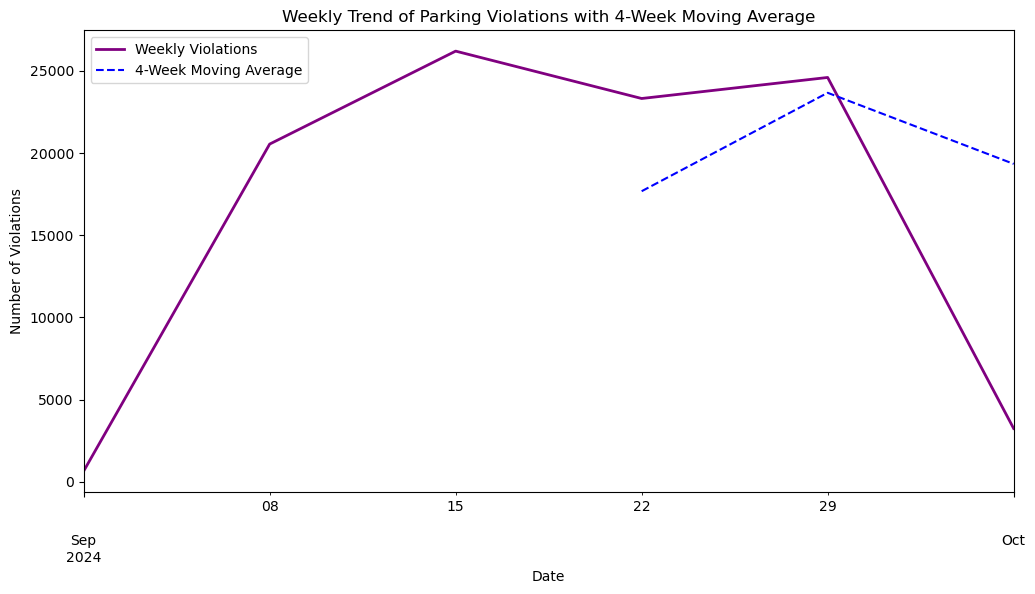

In [10]:

# Replace 'ISSUE_DATE' with the correct column name if it's different
if 'ISSUE_DATE' in df.columns:
    # Convert ISSUE_DATE to datetime if it exists
    df['ISSUE_DATE'] = pd.to_datetime(df['ISSUE_DATE'], errors='coerce')
    df.set_index('ISSUE_DATE', inplace=True)
else:
    print("ISSUE_DATE column not found. Please replace 'ISSUE_DATE' with the actual date column name.")


# Weekly Trend with Moving Average
weekly_violations = df.resample('W').size()  # Aggregate by week
weekly_moving_avg = weekly_violations.rolling(window=4).mean()  # 4-week moving average

# Plot Weekly Trend with Moving Average
plt.figure(figsize=(12, 6))
weekly_violations.plot(label='Weekly Violations', color='purple', linewidth=2)
weekly_moving_avg.plot(label='4-Week Moving Average', color='blue', linestyle='--')
plt.title("Weekly Trend of Parking Violations with 4-Week Moving Average")
plt.xlabel("Date")
plt.ylabel("Number of Violations")
plt.legend()
plt.show()
